# Network Approach

* Source 1: https://www.kaggle.com/code/syphax93/diffusion-of-coronavirus-using-networkx/notebook
* Source 2: https://webthesis.biblio.polito.it/25835/1/tesi.pdf

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

Consider two models for interaction networks:
* Erdos-Reyni which has Poisson degree distribution
* Barabasasi-Albert

## Toy problem

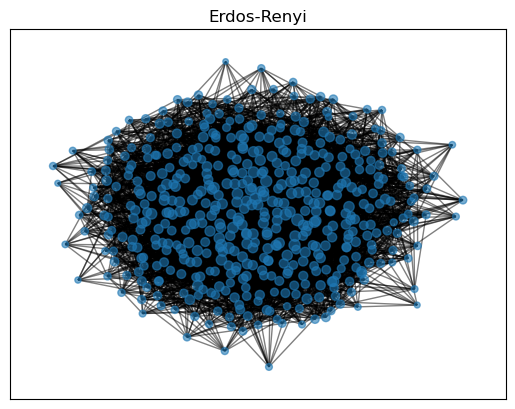

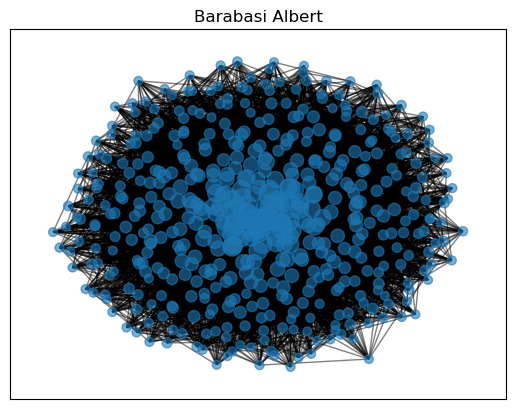

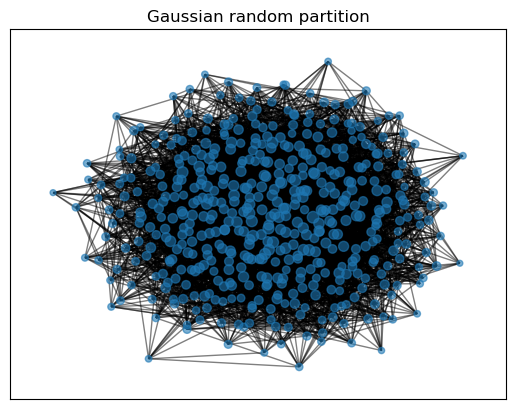

In [2]:
# Size of population
N = 500 # Nodes
k = 20 # 
# Erdos-Reyni k/N represents the probability of an edge existing between any two nodes.
# BA k represents the number of edges to attach from a new node to existing nodes.
# erdos reyni network
G1 = nx.erdos_renyi_graph(N, k/N)
# barabassi-albert
G2 = nx.barabasi_albert_graph(N,k)
G3 = nx.gaussian_random_partition_graph(N,20,20,k/N,k/N)

# plot the graphs
pos1 = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos1, alpha = 0.6, node_size=[2*i for i in list(dict(G1.degree).values())])
nx.draw_networkx_edges(G1, pos1, alpha=0.5)
plt.title("Erdos-Renyi")
plt.show()

pos2 = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos2, alpha = 0.6, node_size=[2*i for i in list(dict(G2.degree).values())])
nx.draw_networkx_edges(G2, pos2, alpha=0.5)
plt.title("Barabasi Albert")
plt.show()

pos3 = nx.spring_layout(G3)
nx.draw_networkx_nodes(G3, pos3, alpha = 0.6, node_size=[2*i for i in list(dict(G3.degree).values())])
nx.draw_networkx_edges(G3, pos3, alpha=0.5)
plt.title("Gaussian random partition")
plt.show()

## SI Model

Has two clases of individuals: not infected (Suceptible) *S*, and infected *I*


It is the simplest contagious disease model
Individuals are born without inmunity, once infected, remain infected throughout life and remain in contact with suceptible population

In [3]:
def SI(G, Nb_inf_init, HM, N, T):
    pos = nx.spring_layout(G)  # Compute the positions of nodes for visualization
    A = nx.to_numpy_array(G)  # Convert graph to adjacency matrix

    sup = np.zeros(T)
    inf = np.zeros(T)
    nb_inf_t = np.zeros(T)

    inf[0] = Nb_inf_init
    sup[0] = N - Nb_inf_init
    nb_inf_t[0] = inf[0]

    # Initialize node states
    for u in G.nodes:
        G.nodes[u]["state"] = 0  # Susceptible
        G.nodes[u]["neighbors"] = list(G.neighbors(u))  # Explicitly convert to list

    # Set initial infected nodes
    init = random.sample(list(G.nodes()), Nb_inf_init)  # Convert to list
    for u in init:
        G.nodes[u]["state"] = 1  # Infected

    # Simulation
    for t in range(1, T):
        sup[t] = sup[t-1]
        inf[t] = inf[t-1]

        newly_infected = []  # Track new infections separately

        for u in G.nodes:
            if G.nodes[u]["state"] == 0:  # If susceptible
                for n in G.nodes[u]["neighbors"]:
                    if G.nodes[n]["state"] == 1 and np.random.rand() < HM:
                        newly_infected.append(u)  # Track new infections
                        break  # Stop checking other neighbors

        # Update states after checking all nodes
        for u in newly_infected:
            G.nodes[u]["state"] = 1
            inf[t] += 1
            sup[t] -= 1

        nb_inf_t[t] = inf[t] - inf[t-1]  # Compute new infections at time t

    return sup, inf, nb_inf_t

In [4]:
# Initial parameters
T = 100
N = 500 # size of population
HM = 0.03 # infection probability
Nb_inf_init = 2 #  Initial numbre of infected person

Erdos Renyi

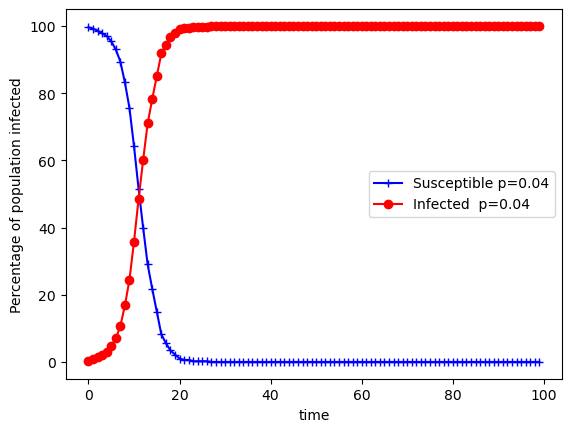

In [5]:
# Erdos Renyi
k = 20
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, nb_inf_t = SI(G, Nb_inf_init, HM, N, T)
plt.figure()  # Ensure a new figure
plt.plot((100/N)*s_erdos, color='b', marker='+', label="Susceptible p=0.04")
plt.plot((100/N)*inf_erdos, color='r', marker='o', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()

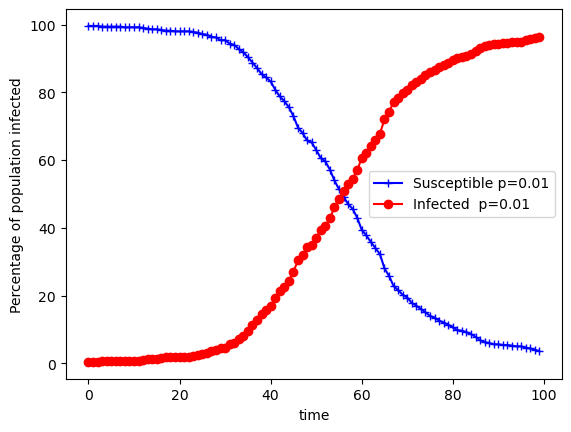

In [6]:
# Erdos Renyi
k = 5
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, nb_inf_t = SI(G, Nb_inf_init, HM, N, T)
plt.figure()  # Ensure a new figure
plt.plot((100/N)*s_erdos, color='b', marker='+', label="Susceptible p=0.01")
plt.plot((100/N)*inf_erdos, color='r', marker='o', label="Infected  p=0.01")
plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()

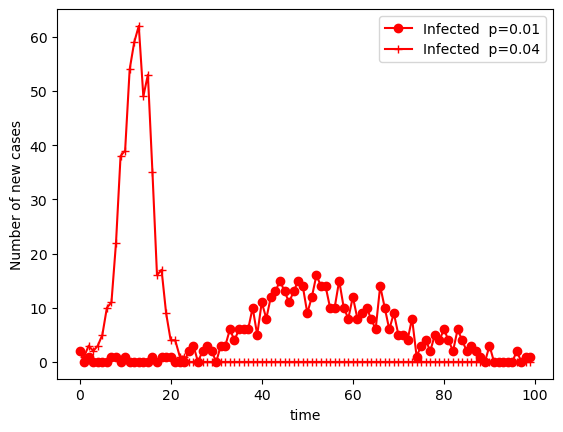

In [7]:
# mean degree of the networks
k = 5
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='o', label="Infected  p=0.01")
plt.xlabel("time")
plt.ylabel("Number of new cases")

k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='+', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Number of new cases")

plt.legend()
plt.show()
##

Erdos-Renyi Barabasi-Albert

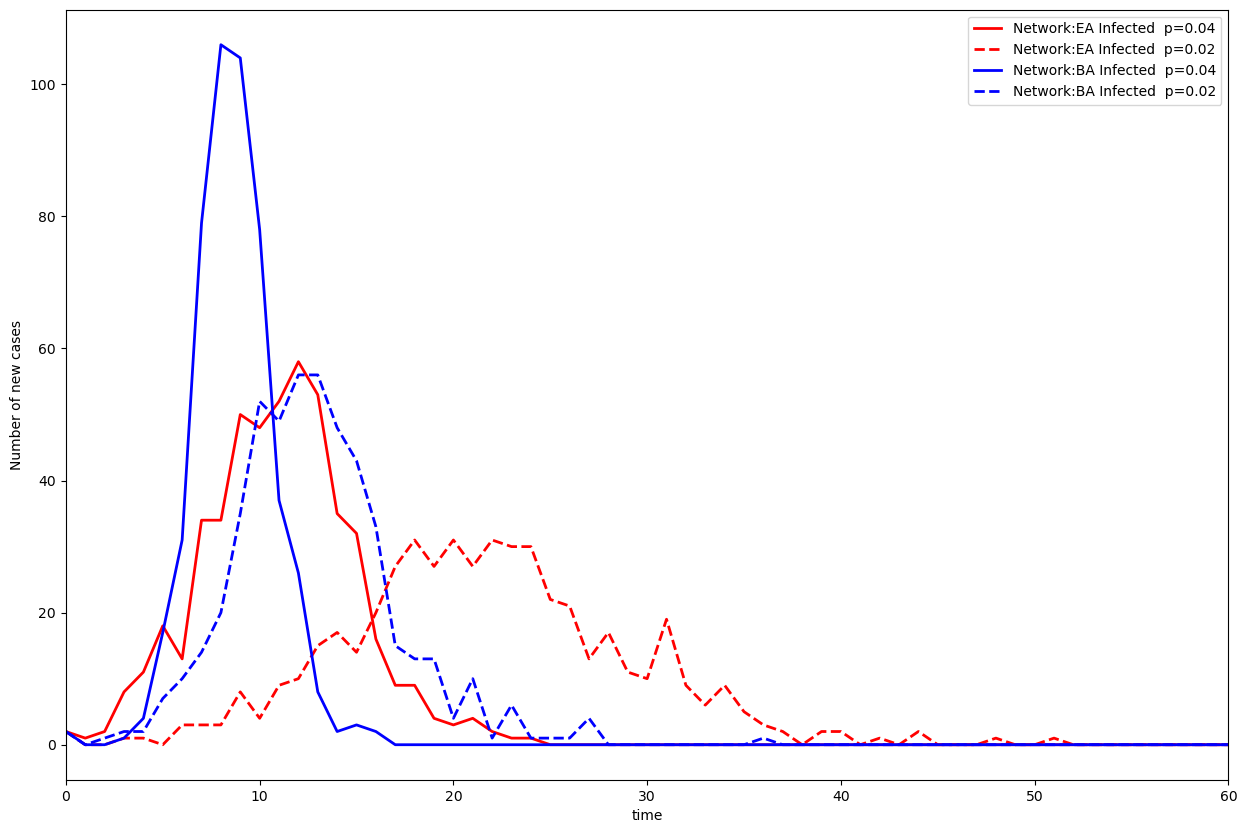

In [8]:
# mean degree of the networks
k = 20
N = 500
Nb_inf_init = 2
# defining an erdos renyi network
G1 = nx.erdos_renyi_graph(N,k/N)
G1_demi = nx.erdos_renyi_graph(N,k/N *0.5)
G2 = nx.barabasi_albert_graph(N, k)
G2_demi = nx.barabasi_albert_graph(N, int(k*0.5))

s_ER, inf_ER,nb_inf_t_ER = SI(G1,Nb_inf_init,HM, N, T)
s_ER_demi, inf_ER_demi,nb_inf_t_ER_demi = SI(G1_demi,Nb_inf_init,HM, N, T)

s_BA, inf_BA,nb_inf_t_BA = SI(G2,Nb_inf_init,HM, N, T)
s_BA_demi, inf_BA_demi,nb_inf_t_BA_demi = SI(G2_demi,Nb_inf_init,HM, N, T)
plt.figure(figsize=(15,10))
plt.plot(nb_inf_t_ER,"r", linewidth=2, label="Network:EA Infected  p=0.04")
plt.plot(nb_inf_t_ER_demi,"r--", linewidth=2, label="Network:EA Infected  p=0.02")


plt.plot(nb_inf_t_BA,"b", linewidth=2, label="Network:BA Infected  p=0.04")
plt.plot(nb_inf_t_BA_demi,"b--", linewidth=2, label="Network:BA Infected  p=0.02")
plt.xlabel("time")
plt.ylabel("Number of new cases")
plt.xlim(0,60)

plt.legend()
plt.show()

# SIR Model

In [9]:
from tqdm import tqdm

In [28]:
def SIR(G, Nb_inf_init, Gamma, HM, N, T):
    """
    Function that runs a simulation of an SIR model on a network.

    Args:
        G (networkx.Graph): The graph representing the network.
        Nb_inf_init (int): Initial number of infected people (nodes).
        Gamma (float): Recovery rate.
        HM (float): Infection probability.
        N (int): Number of agents (nodes).
        T (int): Number of time steps simulated.
    """
    # (Optional) Remove if not needed:
    # A = nx.to_numpy_array(G)

    # Initialize arrays for susceptible, infected, and recovered counts over time
    s = np.zeros(T)
    inf = np.zeros(T)
    r = np.zeros(T)

    # Set initial conditions
    inf[0] = Nb_inf_init
    s[0] = N - Nb_inf_init
    r[0] = 0

    # Initialize node states and neighbors
    for u in G.nodes():
        G.nodes[u]["state"] = 0  # Susceptible
        G.nodes[u]["TimeInfected"] = 0
        G.nodes[u]["neighbors"] = list(G.neighbors(u))  # Rename for clarity

    # Randomly select initial infected nodes (convert nodes to list)
    init = random.sample(list(G.nodes()), Nb_inf_init)
    for u in init:
        G.nodes[u]["state"] = 1  # Infected
        G.nodes[u]["TimeInfected"] = 1

    # Run the simulation for T time steps
    for t in tqdm(range(1, T)):
        s[t] = s[t-1]
        inf[t] = inf[t-1]
        r[t] = r[t-1]

        # Process recovery for infected nodes
        for u in G.nodes():
            if G.nodes[u]["state"] == 1:  # If infected
                if G.nodes[u]["TimeInfected"] < 1/Gamma:  # Using 1/Gamma as recovery threshold
                    G.nodes[u]["TimeInfected"] += 1
                else:
                    G.nodes[u]["state"] = 2  # Recovered
                    r[t] += 1
                    inf[t] -= 1

        # Process contagion for susceptible nodes
        for u in G.nodes():
            if G.nodes[u]["state"] == 0:  # If susceptible
                # (Optional) Count infected neighbors (currently unused)
                # nb_friend_infected = [G.nodes[n]["state"] == 1 for n in G.nodes[u]["neighbors"]].count(True)
                for n in G.nodes[u]["neighbors"]:
                    if G.nodes[n]["state"] == 1:  # If neighbor is infected
                        if np.random.rand() < HM:  # Infect with probability HM
                            G.nodes[u]["state"] = 1  # Change state to infected
                            G.nodes[u]["TimeInfected"] = 1  # Initialize time since infection
                            inf[t] += 1
                            s[t] -= 1
                            break

    return s, inf, r

In [30]:
# optimized version
import numpy as np
import random
from tqdm import tqdm

def SIR_fast(G, Nb_inf_init, Gamma, HM, N, T):
    # Initialize states: 0 = susceptible, 1 = infected, 2 = recovered
    states = np.zeros(N, dtype=np.int8)
    time_infected = np.zeros(N, dtype=np.float32)

    # Precompute neighbor lists (assuming nodes are numbered 0 to N-1)
    neighbors = [list(G.neighbors(i)) for i in range(N)]

    # Initialize infected set
    infected = set(random.sample(range(N), Nb_inf_init))
    for i in infected:
        states[i] = 1
        time_infected[i] = 1

    # Arrays to record counts over time
    s = np.zeros(T)
    inf = np.zeros(T)
    r = np.zeros(T)
    s[0] = N - Nb_inf_init
    inf[0] = Nb_inf_init
    r[0] = 0

    # Run simulation
    for t in tqdm(range(1, T)):
        new_infected = set()
        recovered = set()
        
        # Process recovery for infected nodes
        for i in list(infected):
            time_infected[i] += 1
            if time_infected[i] >= 1 / Gamma:
                states[i] = 2  # Recovered
                recovered.add(i)
        infected.difference_update(recovered)
        
        # Process contagion from infected nodes to their neighbors
        for i in infected:
            for n in neighbors[i]:
                if states[n] == 0 and np.random.rand() < HM:
                    states[n] = 1  # Newly infected
                    time_infected[n] = 1
                    new_infected.add(n)
        infected.update(new_infected)
        
        # Update counts
        s[t] = np.count_nonzero(states == 0)
        inf[t] = len(infected)
        r[t] = np.count_nonzero(states == 2)
        
    return s, inf, r


100%|████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1356.50it/s]


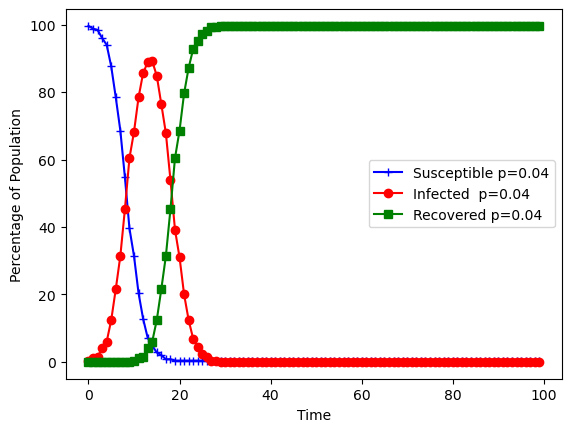

100%|████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1041.55it/s]


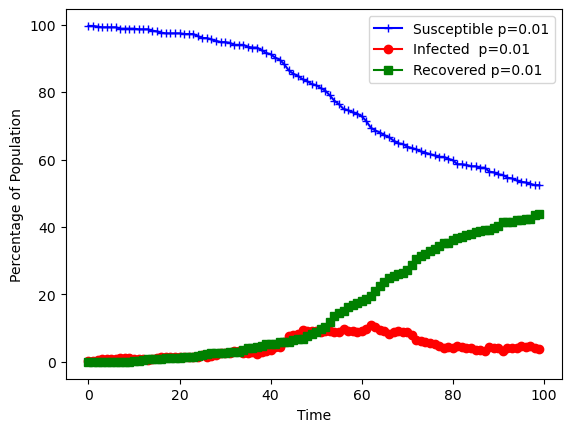

In [19]:
# Test the function
T = 100
N = 500
HM = 0.03  # Infection probability
Gamma = 0.1  # Recovery probability per time step
Nb_inf_init = 2  # Initial infected individuals

# Erdos-Renyi Graph
k = 20
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, r_erdos = SIR(G, Nb_inf_init, Gamma, HM, N, T)
plt.figure()
plt.plot((100/N) * s_erdos, color='b', marker='+', label="Susceptible p=0.04")
plt.plot((100/N) * inf_erdos, color='r', marker='o', label="Infected  p=0.04")
plt.plot((100/N) * r_erdos, color='g', marker='s', label="Recovered p=0.04")
plt.xlabel("Time")
plt.ylabel("Percentage of Population")
plt.legend()
plt.show()

# Second Erdos-Renyi Graph
k = 5
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, r_erdos = SIR(G, Nb_inf_init, Gamma, HM, N, T)
plt.figure()
plt.plot((100/N) * s_erdos, "b", marker='+', label="Susceptible p=0.01")
plt.plot((100/N) * inf_erdos, "r", marker='o', label="Infected  p=0.01")
plt.plot((100/N) * r_erdos, "g", marker='s', label="Recovered p=0.01")
plt.xlabel("Time")
plt.ylabel("Percentage of Population")
plt.legend()
plt.show()

# Real Data

In [12]:
# country populations 2020
country_pop = {'Brazil':208126926,
               'Chile':19331414,
               'Colombia':50326931,
               'Dominican Republic': 10948573,
               'Germany': 83634807,
               'Italy': 60041302,
               'Mexico':126356930 ,
               'Panama':4267228,
               'US':339142428,
               'Uruguay':3397691}

In [13]:
import pandas as pd
df = pd.read_csv('../Data/silver/covid_data.csv')
df.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [14]:
df_ger = df[df.country == 'Germany'].copy()
df_ger = df_ger[df_ger.cases != 0].reset_index(drop = True)
df_ger.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Germany,51.165691,10.451526,2020-01-27,1,1
1,NaN,Germany,51.165691,10.451526,2020-01-28,4,3
2,NaN,Germany,51.165691,10.451526,2020-01-29,4,0
3,NaN,Germany,51.165691,10.451526,2020-01-30,4,0
4,NaN,Germany,51.165691,10.451526,2020-01-31,5,1


In [15]:
ger_cases = df_ger.cases
ger_cases

0              1
1              4
2              4
3              4
4              5
          ...   
1133    38210851
1134    38210851
1135    38231610
1136    38241231
1137    38249060
Name: cases, Length: 1138, dtype: int64

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:25<00:00,  3.85it/s]


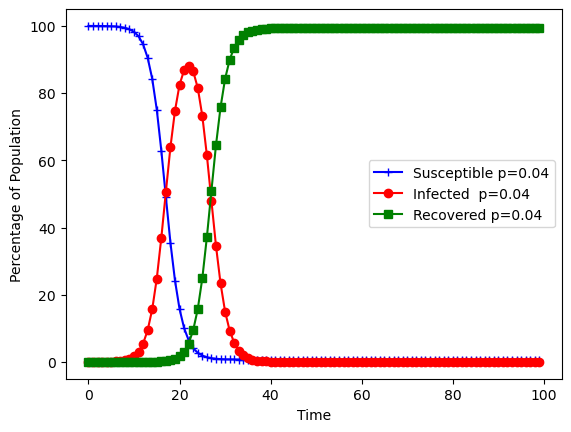

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:28<00:00,  3.51it/s]


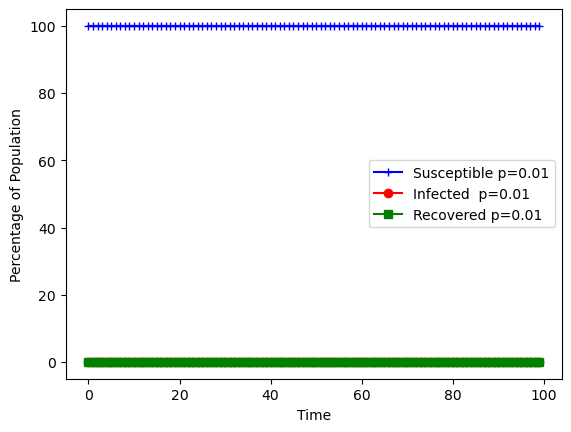

CPU times: total: 15min 25s
Wall time: 15min 28s


In [31]:
%%time
# Test the function
T =  100 #len(ger_cases) # obtained from data
N = int(country_pop['Germany']/1000) # obtained from data
HM = 0.03  # Infection probability - can be optimized
Gamma = 0.1  # Recovery probability per time step - can be optimized
Nb_inf_init = ger_cases[0]  # Initial infected individuals - obtained from data

# Erdos-Renyi Graph
k = 20 # aribtrary, check how to define / probability of node attaching k/N
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, r_erdos = SIR(G, Nb_inf_init, Gamma, HM, N, T)
plt.figure()
plt.plot((100/N) * s_erdos, color='b', marker='+', label="Susceptible p=0.04")
plt.plot((100/N) * inf_erdos, color='r', marker='o', label="Infected  p=0.04")
plt.plot((100/N) * r_erdos, color='g', marker='s', label="Recovered p=0.04")
plt.xlabel("Time")
plt.ylabel("Percentage of Population")
plt.legend()
plt.show()

# Second Erdos-Renyi Graph
k = 5 # arbitrary, check definition
G = nx.erdos_renyi_graph(N, k/N)

s_erdos, inf_erdos, r_erdos = SIR(G, Nb_inf_init, Gamma, HM, N, T)
plt.figure()
plt.plot((100/N) * s_erdos, "b", marker='+', label="Susceptible p=0.01")
plt.plot((100/N) * inf_erdos, "r", marker='o', label="Infected  p=0.01")
plt.plot((100/N) * r_erdos, "g", marker='s', label="Recovered p=0.01")
plt.xlabel("Time")
plt.ylabel("Percentage of Population")
plt.legend()
plt.show()

optimized 13.5 s
unoptimized 12.6 s